In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

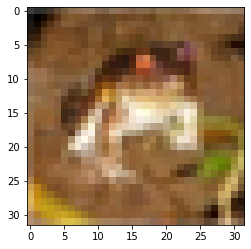

In [ ]:
# Rana
plt.imshow(X_train[0]);

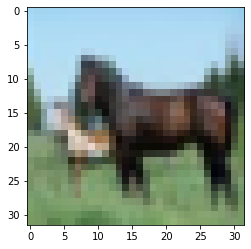

In [ ]:
# Caballo
plt.imshow(X_train[12]);

# Pre-procesamiento

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
X_train = X_train/255

In [ ]:
X_val = X_val/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_val.shape

(10000, 32, 32, 3)

## Variable Objetivo

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_val = to_categorical(y_val, num_classes=10)

# Diseño de arquitectura

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=4, strides=1, padding='same', input_shape=(32, 32, 3), activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=4, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))

# CAPA DE SALIDA (10 clases posibles)
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Entenamiento de Modelo

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
%%time
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_val, y_cat_val), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.4375 - accuracy: 0.4811 - val_loss: 1.1685 - val_accuracy: 0.5875
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0795 - accuracy: 0.6188 - val_loss: 1.0481 - val_accuracy: 0.6337
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9307 - accuracy: 0.6745 - val_loss: 0.9405 - val_accuracy: 0.6667
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8181 - accuracy: 0.7119 - val_loss: 0.9728 - val_accuracy: 0.6664
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7283 - accuracy: 0.7459 - val_loss: 0.9289 - val_accuracy: 0.6840
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6432 - accuracy: 0.7746 - val_loss: 0.9179 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5681 - accuracy: 0.8008 - val_loss: 0.9366 - val_accuracy

In [ ]:
# Persistencia de modelo
model.save('cifar_10epochs.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.437466,0.48108,1.168494,0.5875
1,1.079492,0.61878,1.048060,0.6337
2,0.930680,0.67446,0.940548,0.6667
3,0.818127,0.71192,0.972769,0.6664
4,0.728294,0.74590,0.928891,0.6840
5,0.643164,0.77464,0.917946,0.6947
6,0.568140,0.80080,0.936577,0.6959
7,0.493556,0.82526,0.983172,0.6894
8,0.426669,0.84974,1.093663,0.6862


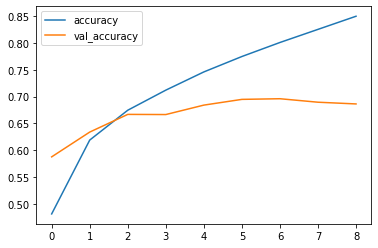

In [ ]:
losses[['accuracy','val_accuracy']].plot();

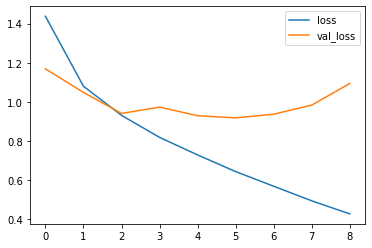

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_val, y_cat_val, verbose=0))

['loss', 'accuracy']
[1.0936625003814697, 0.6862000226974487]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(X_val)
predictions = np.argmax(predictions, axis=1).reshape(len(X_val), 1)

In [ ]:
y_val.shape, predictions.shape

((10000, 1), (10000, 1))

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.82      0.81      0.81      1000
           2       0.57      0.58      0.58      1000
           3       0.47      0.50      0.48      1000
           4       0.64      0.59      0.62      1000
           5       0.53      0.64      0.58      1000
           6       0.70      0.80      0.75      1000
           7       0.82      0.69      0.75      1000
           8       0.86      0.76      0.81      1000
           9       0.83      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
confusion_matrix(y_val, predictions)

array([[770,  13,  62,  22,  21,  16,  14,  14,  45,  23],
       [ 22, 805,   9,  24,   7,  13,  16,   6,  25,  73],
       [ 64,   5, 585,  76,  80,  97,  68,  12,   9,   4],
       [ 27,  10,  79, 500,  66, 209,  77,  19,   3,  10],
       [ 33,   2, 100,  73, 588,  72,  79,  44,   7,   2],
       [ 16,   2,  51, 176,  41, 636,  42,  26,   6,   4],
       [  5,   4,  57,  67,  29,  34, 796,   3,   2,   3],
       [ 18,   2,  39,  68,  62, 101,   8, 693,   2,   7],
       [ 84,  40,  21,  25,  13,  13,  10,   8, 761,  25],
       [ 39,  93,  16,  31,   5,  18,  20,  22,  28, 728]])

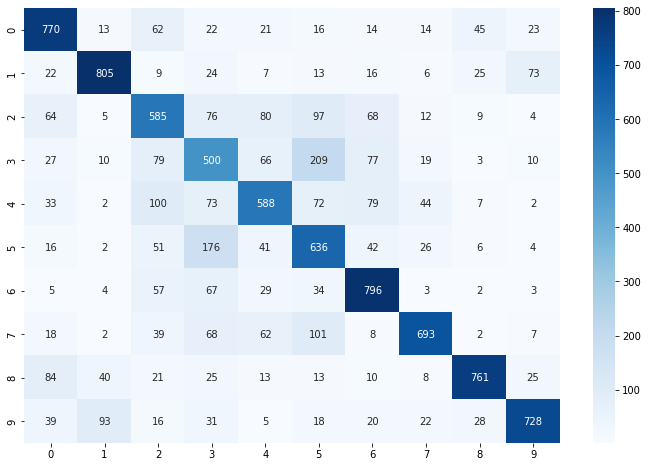

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, cmap="Blues", fmt=".3g");

# Predicciones

In [ ]:
my_image = X_val[1]

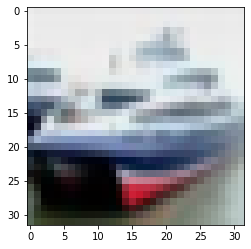

In [ ]:
plt.imshow(my_image);

In [ ]:
# Dimensiones --> (catidad de imágenes, ancho, alto, canales)
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

8